## Численные методы 2.
#### Козловский А.А., гр. 2253

In [12]:
import numpy as np
from sympy import Symbol, Function, lambdify, diff
import matplotlib.pyplot as plt
from sympy import exp
from IPython.display import display, HTML, Markdown

In [25]:
x = np.linspace(-1, 1, 100)
y = lambda x: np.exp(x) + 1.5 * x ** 3 - 2

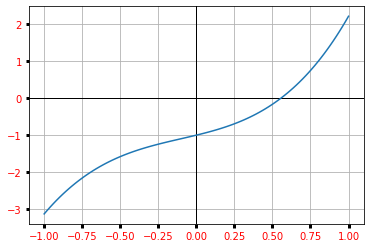

In [26]:
fig, ax = plt.subplots()

ax.grid(True)
ax.tick_params(labelcolor='r', labelsize='medium', width=3)
ax.axhline(y=0, color='black', linewidth=1)
ax.axvline(x=0, color='black', linewidth=1)
ax.plot(x, y(x))

plt.show()

### Реализиации необходимых функций

In [27]:
def bisection_method(y, x_min, x_max, eps=1e-5):
    """
    Функция для нахождения корня методом бисекций

    y: лямбда выражение, характеризующее функцию y(x)
    x_min: левая граница интервала, на котором происходит поиск
    x_max: правая граница интервала, на котором происходит поиск
    eps: требуемая погрешность

    returns: левая граница получившегося интервала, 
    правая граница получившегося интервала, количество итераций
    """

    iters = 0
    while np.abs(y(x_min) - y(x_max)) >= eps:
        x_center = (x_min + x_max) / 2

        if y(x_center) * y(x_min) < 0:
            x_max = x_center
        else:
            x_min = x_center
            
        iters += 1

    return x_min, x_max, iters

In [16]:
def check_for_newton_method(f, arg, min_x, max_x, x_0):
    """
    Функция для проверки, выполняются ли достаточные условия для
    сходимости итерационного процесса в методе Ньютона

    f: функция в символьном виде [sympy Function]
    arg: аргумент функции в символьном виде [sympy Symbol]
    min_x: левая граница интервала поиска 
    max_x: правая граница интервала поиска 
    x_0: начальная точка

    returns: True - если все условия выполняются, False - если хотя бы одно
    условие не выполнилось
    """
    f_ld = lambdify(arg, f)
    der_1 = diff(f, arg)
    der_2 = diff(der_1, arg)

    der_1_ld = lambdify(arg, der_1)
    der_2_ld = lambdify(arg, der_2)
    x = np.linspace(min_x, max_x, 100)
    
    try:
        max_der_1 = np.max([der_1_ld(i) for i in x])
        min_der_1 = np.min([der_1_ld(i) for i in x])
        max_der_2 = np.max([der_2_ld(i) for i in x])
        min_der_2 = np.min([der_2_ld(i) for i in x])
    except TypeError:
        return False, None, None
    
    phi_der = diff(arg - f / diff(f))
    phi_der_ld = lambdify(arg, phi_der)
    min_der_phi = np.min([phi_der_ld(i) for i in x])
    max_der_phi = np.max([phi_der_ld(i) for i in x])
    
    if np.abs(max_der_phi) >= 1 or np.abs(min_der_phi) >= 1:
        return False, None, None

    if min_der_1 * max_der_1 < 0 or min_der_2 * max_der_2 < 0:
        return False, None, None

    if f_ld(x_0) * der_2_ld(x_0) <= 0:
        return False, None, None

    return True, f_ld, der_1_ld 

In [30]:
def newton_method(f, arg, min_x, max_x, eps=1e-5):
    """
    Функция для решения уравнения методом Ньютона
    f: функция в символьном виде [sympy Function]
    arg: аргумент функции в символьном виде [sympy Symbol]
    min_x: левая граница интервала поиска 
    max_x: правая граница интервала поиска 
    eps: погрешность

    returns: корень уравнения с заданной точностью, количество итераций
    """

    check, f_ld, der_1_ld = check_for_newton_method(f, arg, min_x, max_x,
                                                np.average([min_x, max_x]))
    if not check:
        raise TypeError
        
    x = (min_x + max_x) / 2
    x_old = x + 1
    iters = 0
    while np.abs(x_old - x) >= eps:
        x_old = x
        x -= f_ld(x) / der_1_ld(x)
        iters += 1
    return x, iters

### Определение функции и решение уравнения

In [28]:
x = np.linspace(0, 1, 100)

# Определим функцию
arg = Symbol('x')
f = exp(arg) + 1.5 * arg ** 3 - 2
f_ld = lambdify(arg, f)
display(Markdown(r'''
Дана функция $f(x) = e^{x} + 1.5 x^{3} - 2$ <p>
Решить уравнение $f(x) = 0$'''))


Дана функция $f(x) = e^{x} + 1.5 x^{3} - 2$ <p>
Решить уравнение $f(x) = 0$

In [29]:
min_x, max_x, iters_1 = bisection_method(f_ld, 0, 1, 1e-2)
display(Markdown(rf'''
<i><u>Результат работы метода бисекций</u></i> <p>
В результате метода бисекций мы смогли сузить отрезок для поиска корня до 
$[{min_x}, {max_x}]$ за ${iters_1}$ итераций <p>
<u>Ответ</u>: $[{min_x}, {max_x}]$'''))


<i><u>Результат работы метода бисекций</u></i> <p>
В результате метода бисекций мы смогли сузить отрезок для поиска корня до 
$[0.5546875, 0.556640625]$ за $9$ итераций <p>
<u>Ответ</u>: $[0.5546875, 0.556640625]$

In [31]:
result, iters_2 = newton_method(f, arg, min_x, max_x, 0.5 * 1e-9)
display(Markdown(rf'''
<i><u>Результат работы метода Ньютона</u></i> <p>
В результате метода Ньютона получили результат ${result:.8f}$ за ${iters_2}$ итераций, используя
отрезок полученный ранее, т.е. $[{min_x}, {max_x}]$ <p>
<u>Ответ</u>: ${result:.8f}$'''))


<i><u>Результат работы метода Ньютона</u></i> <p>
В результате метода Ньютона получили результат $0.55552022$ за $3$ итераций, используя
отрезок полученный ранее, т.е. $[0.5546875, 0.556640625]$ <p>
<u>Ответ</u>: $0.55552022$

In [32]:
display(Markdown(rf'''
$|f({result:.8f})| = {np.abs(f_ld(result))}$'''))


$|f(0.55552022)| = 0.0$